## Importing Libraries

The data shows netflix movies, when they are released, their actors, directors, budget, revenue and Gross. The data was in raw form and we performed the following steps after data import. We inspected the data and gather the basic information from the data. Afer that we started cleaning the data and first step we took was to properly capitalize the columns names and we did by using for loop. In the second step we looked for duplicate values and no values were found. In the third step, we looked for null values and there were some null values and we removed the values by dropna code. In fourth step, we changed the data type of Gross and Budget as there were too many decimels, we changed the data from floating to integers so the data looks good. In step five, we used value count in Genre and Ratings and also visualize the data using bar chart. In the last step we did some exploratory analysis and from the data we found out the following. 1. Movies with biggest budget, top five. 2. Movies with lowest budget top five. 3. Directors with highest and lowest ratings. 4. Movies with highest and lowest gross. 5. Actors with highest gross, movies produced by each country and movies produced each year. This not only cleaned the data but showed most of the important imnformation which can be used. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing data

In [4]:
df= pd.read_excel(r"E:\projects\EDA\movies_data.xlsx")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


we use df.shape to see how many rows and columns are in the data frame

## Inspecting the Data

In [4]:
df.shape

(7668, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


this is used to look at all the columns and their data types

In [7]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Data cleaning

we will first capitalize the columns names properly

In [8]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

we will use for loop to capitalize all the columns names

In [9]:
column_names= []
for i in df.columns:
    column_names.append(i.capitalize())

    
print(column_names)
    
    
    

['Name', 'Rating', 'Genre', 'Year', 'Released', 'Score', 'Votes', 'Director', 'Writer', 'Star', 'Country', 'Budget', 'Gross', 'Company', 'Runtime']


In [10]:
df.columns= column_names

by using the above method just by one code, we have capitalize all the names of columns

In [11]:
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### now we will look for duplictes values and if there are any duplicate values we will drop them

In [12]:
df.duplicated().sum()

np.int64(0)

the result shows that there are no duplicate values in the whole data frame

After dealing with duplicates, now we will deal with null values. 

In [13]:
df.isna().sum()

Name           0
Rating        77
Genre          0
Year           0
Released       2
Score          3
Votes          3
Director       0
Writer         3
Star           1
Country        3
Budget      2171
Gross        189
Company       17
Runtime        4
dtype: int64

we will drop the null values now

In [14]:
df= df.dropna()

this is the newtable having less rows now

In [15]:
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Changing Data Types

now we have two columns with data type float and we will change into integers.

In [16]:
df.loc[:, 'Budget']= df['Budget'].astype(int)
df.loc[:, 'Gross']= df['Gross'].astype(int)

In [17]:
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


the data looks good now after we have removed the decimals

now we will look into some statitics about the data

In [36]:
df.describe()

,Year,Score,Votes,Budget,Gross,Runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


there are two types of ratings we will find the count of each rating and then will try to visulaize it

## Data Visualisation

In [38]:
df['Rating'].value_counts()

Rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

<Axes: xlabel='Rating'>

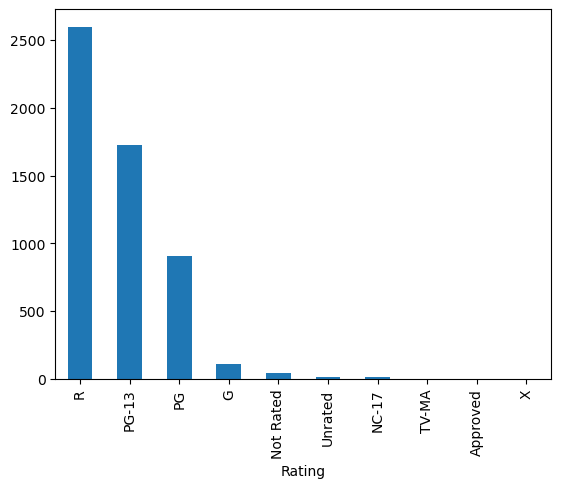

In [40]:
df['Rating'].value_counts().plot(kind= 'bar')

the bar chart shows the count of each rating type

<Axes: xlabel='Genre'>

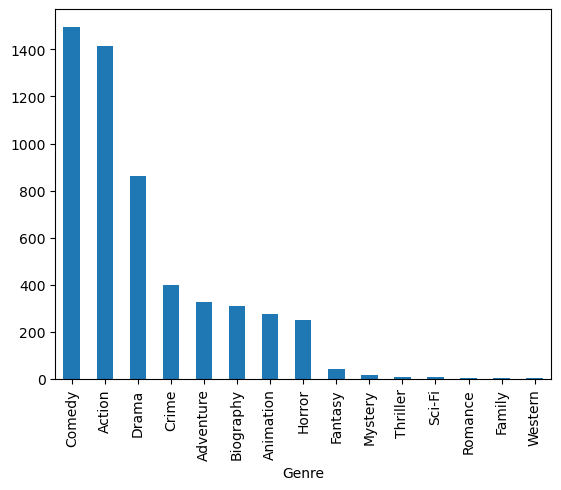

In [18]:
df['Genre'].value_counts().plot(kind= 'bar')
#it shows movies in each Genre produced over the year

same is done for genre and the chart shows number of films in each genre

now we will find the movies with the highes gross income and then with the highest and lowest gross and budget

In [56]:
df = df.reset_index(drop=True)

In [19]:
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
df['Budget'].sort_values(ascending= False)
#This list shows the movies by highest budgets in descending order

7445    356000000.0
7244    321000000.0
7075    317000000.0
7066    300000000.0
5060    300000000.0
           ...     
2211        22769.0
5114        15000.0
4507         7000.0
2093         7000.0
3318         6000.0
Name: Budget, Length: 5421, dtype: float64

In [64]:
df.loc[5302]

Name                     Avengers: Endgame
Rating                               PG-13
Genre                               Action
Year                                  2019
Released    April 26, 2019 (United States)
Score                                  8.4
Votes                             903000.0
Director                     Anthony Russo
Writer                  Christopher Markus
Star                     Robert Downey Jr.
Country                      United States
Budget                           356000000
Gross                           2797501328
Company                     Marvel Studios
Runtime                              181.0
Name: 5302, dtype: object

this is the movie with highest budget

In [65]:
df.loc[2012]

Name                                Following
Rating                                      R
Genre                                   Crime
Year                                     1998
Released    November 5, 1999 (United Kingdom)
Score                                     7.5
Votes                                 89000.0
Director                    Christopher Nolan
Writer                      Christopher Nolan
Star                          Jeremy Theobald
Country                        United Kingdom
Budget                                   6000
Gross                                   48482
Company                       Next Wave Films
Runtime                                  69.0
Name: 2012, dtype: object

this is the movie with lowest budget.

3731    2847246203
5302    2797501328
1795    2201647264
4730    2069521700
5158    2048359754
           ...    
3898          5073
1378          2970
2286          2554
154           2270
1920           309
Name: Gross, Length: 5421, dtype: int64

In [67]:
df.loc[3731]

Name                                   Avatar
Rating                                  PG-13
Genre                                  Action
Year                                     2009
Released    December 18, 2009 (United States)
Score                                     7.8
Votes                               1100000.0
Director                        James Cameron
Writer                          James Cameron
Star                          Sam Worthington
Country                         United States
Budget                              237000000
Gross                              2847246203
Company                 Twentieth Century Fox
Runtime                                 162.0
Name: 3731, dtype: object

this is the highest gross movies from the data

In [68]:
df.loc[1920]

Name                      Trojan War
Rating                         PG-13
Genre                         Comedy
Year                            1997
Released    October 1, 1997 (Brazil)
Score                            5.7
Votes                         5800.0
Director                George Huang
Writer                     Andy Burg
Star                    Will Friedle
Country                United States
Budget                      15000000
Gross                            309
Company                     Daybreak
Runtime                         85.0
Name: 1920, dtype: object

lowest gross movie

In [69]:
df['Score'].sort_values(ascending= False)

1383    9.3
3558    9.0
2753    8.9
1246    8.9
1384    8.9
       ... 
628     2.2
2893    2.1
2847    2.1
3617    1.9
3044    1.9
Name: Score, Length: 5421, dtype: float64

In [71]:
df.loc[1383]

Name                The Shawshank Redemption
Rating                                     R
Genre                                  Drama
Year                                    1994
Released    October 14, 1994 (United States)
Score                                    9.3
Votes                              2400000.0
Director                      Frank Darabont
Writer                          Stephen King
Star                             Tim Robbins
Country                        United States
Budget                              25000000
Gross                               28817291
Company            Castle Rock Entertainment
Runtime                                142.0
Name: 1383, dtype: object

 The Shawshank Redemption is the highest rating movie in the list

In [72]:
df.loc[3044]

Name           Superbabies: Baby Geniuses 2
Rating                                   PG
Genre                                Comedy
Year                                   2004
Released    August 27, 2004 (United States)
Score                                   1.9
Votes                               30000.0
Director                          Bob Clark
Writer                      Robert Grasmere
Star                             Jon Voight
Country                             Germany
Budget                             20000000
Gross                               9448644
Company            ApolloMedia Distribution
Runtime                                88.0
Name: 3044, dtype: object

uperbabies: Baby Geniuses 2 is the low rate movie in the list

In [82]:
df['Year'].value_counts()

Year
2002    173
2008    171
2009    171
2005    170
2010    164
2001    164
2014    163
2006    163
1999    162
2000    162
2012    162
2013    161
2011    160
2003    159
2016    158
2004    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
2019    113
1991    113
1990    111
1987    104
1986     99
1985     95
1984     88
1983     83
1982     71
1981     63
1980     40
2020      8
Name: count, dtype: int64

the output shows the number of movies released eachyear.

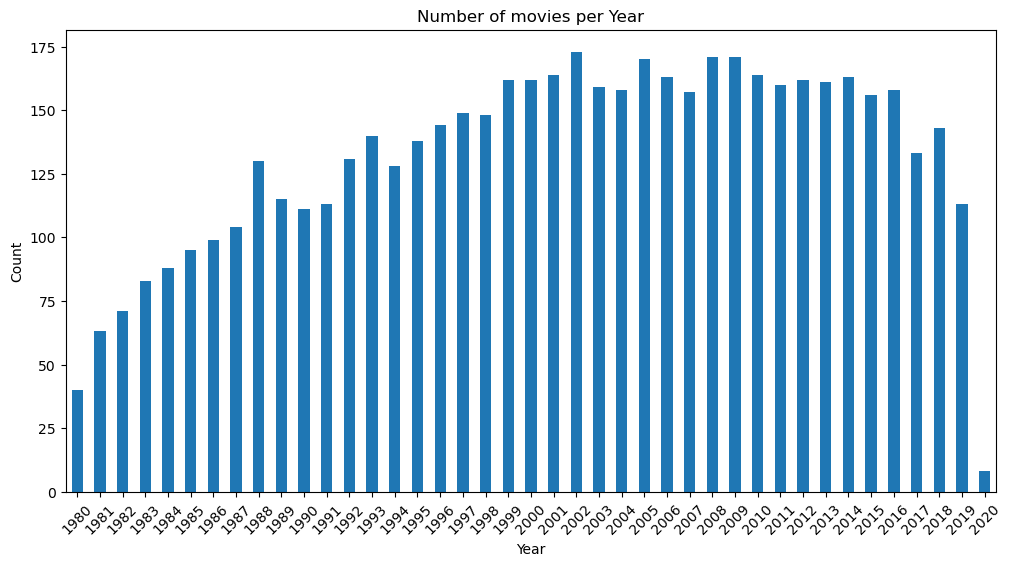

In [84]:
year_counts = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
year_counts.plot(kind='bar')
plt.title('Number of movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

we will now find if there is any correlation between budget and gross

In [86]:
df['Budget'].corr(df['Gross'])

np.float64(0.7402465439219631)

it shows that there is high correlation between budget and gross

In [90]:
correlation= df.corr(numeric_only=True)

In [91]:
correlation

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
Score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
Votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
Budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
Gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
Runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


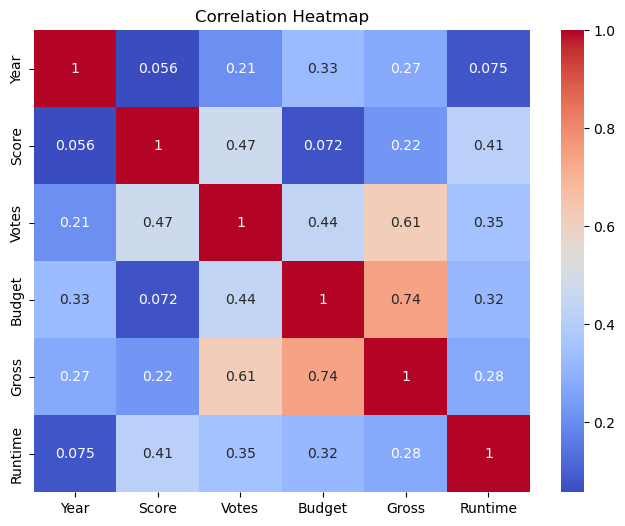

In [93]:
correlation = df.corr(numeric_only= True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#now we will find and show which countries produce the most movies

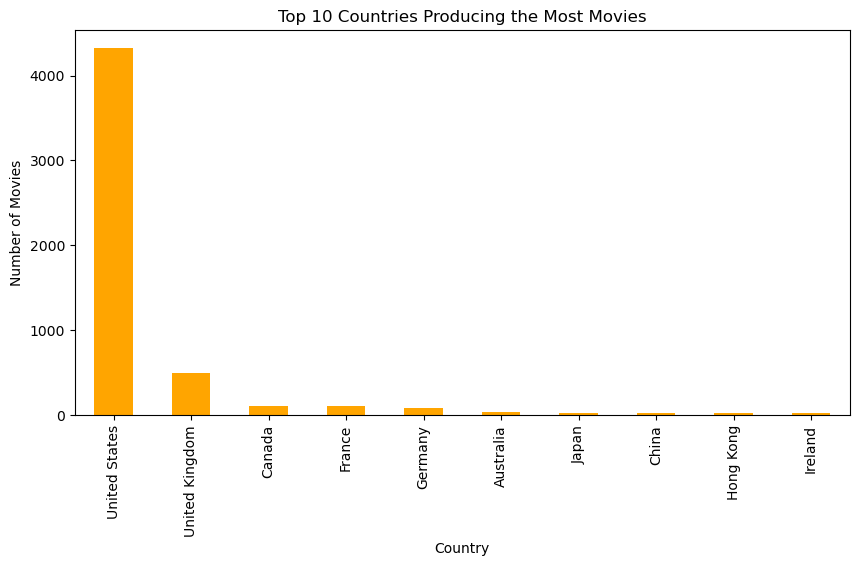

In [94]:
movies_by_country = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
movies_by_country.plot(kind='bar', color='orange')
plt.title('Top 10 Countries Producing the Most Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

we will find now which producers produce top rating movies

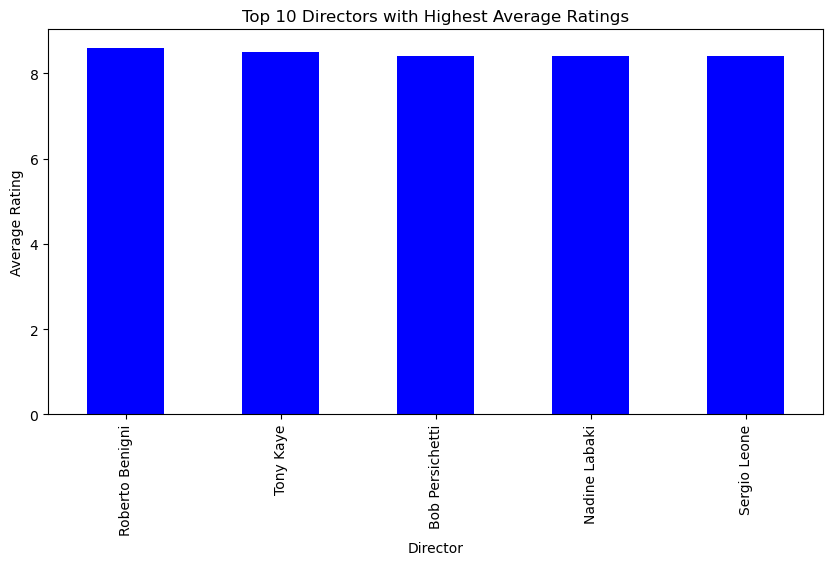

In [110]:
top_directors = df.groupby('Director')['Score'].mean().sort_values(ascending= False).head(5)
plt.figure(figsize=(10,5))
top_directors.plot(kind='bar', color='blue')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

In [105]:
top_directors

Director
Roberto Benigni       8.600
Tony Kaye             8.500
Bob Persichetti       8.400
Nadine Labaki         8.400
Sergio Leone          8.400
                      ...  
Jason Friedberg       2.625
Rod Amateau           2.600
Roger Christian       2.500
Farhad Mann           2.500
Vondie Curtis-Hall    2.300
Name: Score, Length: 2063, dtype: float64

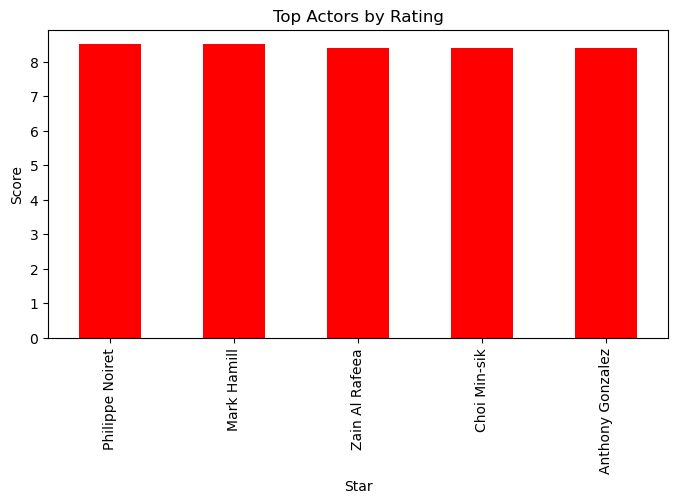

In [114]:
top_actors = df.groupby('Star')['Score'].mean().sort_values(ascending= False).head(5)
plt.figure(figsize= (8,4))
top_actors.plot(kind= 'bar', color= 'red')
plt.title('Top Actors by Rating')
plt.xlabel('Star')
plt.ylabel('Score')
plt.show()

In [ ]:
#the last thing in our analysis we will do is to find which actors have given the biggest hits or generate the most gross

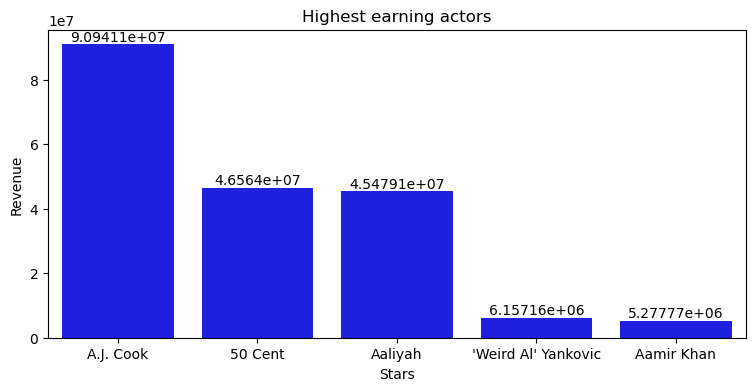

In [127]:
actors_gross=( df.groupby('Star') ["Gross"].mean().head(5).sort_values(ascending= False).reset_index())
plt.figure(figsize=(9,4))
ax = sns.barplot(x='Star', y='Gross', data=actors_gross , color='blue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Highest earning actors')
plt.xlabel('Stars')
plt.ylabel('Revenue')
plt.show()
                         

In [7]:
df.to_excel(r"E:\projects\EDA\movies_data_cleaned.xlsx", index=False)